<a href="https://colab.research.google.com/github/Harithamuralidharan/Machine-Learning/blob/main/ML_capstone_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project Title: Credit Card Fraud Detection🌠🎯**

##**✨📰Problem Statement:**

With the increasing prevalence of online transactions, ensuring the security of credit card
transactions is very important. The objective of this project is to develop a robust machine
learning model capable of accurately detecting fraudulent credit card transactions in real-time.
Utilizing a dataset containing transaction details such as transaction amount, merchant
category, cardholder information, transaction location, the aim is to build a predictive model
that can effectively differentiate between legitimate and fraudulent transactions. By employing
advanced machine learning algorithms and feature engineering techniques, the goal is to create
a system that enhances fraud detection capabilities, thereby minimizing financial losses for both
cardholders and financial institutions while maintaining a low false positive rate. Ultimately, this
project seeks to contribute to the development of proactive measures for securing credit card
transactions and safeguarding the financial interests of stakeholders in the digital economy.

#**Initial Exploratory Aata Analysis(EDA)📊📚**

In [ ]:
#model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/ArchanaInsights/Datasets/refs/heads/main/credit_card_transactions.csv')
data.head(10)

,Transaction_ID,Card_Type,Merchant_Category,Transaction_Amount,Transaction_DateTime,Location,Region,Cardholder_Age,Cardholder_Gender,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit,Device_Type,Day_of_Week,Is_Fraudulent
0,W963UK57,Mastercard,Utility bill,27214.0,2020-01-01 09:43:17,Patna,East,23.0,Female,94632.0,36369.65,100000.0,Unknown,Wednesday,No
1,V606KV56,American Express,Retail,83956.0,2020-01-03 16:26:13,Surat,West,49.0,Male,148118.0,89179.12,150000.0,Desktop,Friday,No
2,R531NU70,Visa,Transportation,193280.0,2020-01-04 03:40:49,Patna,East,NaN,Male,210921.0,106668.60,200000.0,Desktop,Saturday,No
3,T783GF79,RuPay,Online Shopping,167381.0,2020-01-04 14:56:24,Surat,West,52.0,Female,148070.0,173155.52,200000.0,Desktop,Saturday,Yes
4,K256ZN73,RuPay,Retail,81170.0,2020-01-04 17:26:47,Lucknow,North,37.0,Female,174470.0,52713.09,200000.0,Mobile,Saturday,No
5,I812SG19,RuPay,Entertainment,131918.0,2020-01-04 19:55:12,Mumbai,West,80.0,Male,166671.0,80393.44,150000.0,Point-of-Sale Terminal,Saturday,No
6,Y182UO40,Visa,Retail,139036.0,2020-01-05 16:33:10,Surat,West,33.0,Male,171991.0,84215.74,150000.0,Desktop,Sunday,Yes
7,R809YU99,RuPay,Online Shopping,49967.0,2020-01-05 19:37:50,Surat,West,46.0,Female,56248.0,45671.98,50000.0,Point-of-Sale Terminal,Sunday,No
8,Q473IV29,Mastercard,Entertainment,44528.0,2020-01-05 19:55:48,Kolkata,East,44.0,Male,93854.0,29653.72,100000.0,Unknown,Sunday,No
9,V841LV15,Mastercard,Retail,29587.0,2020-01-05 23:30:04,Patna,East,77.0,Female,55448.0,22530.16,50000.0,Point-of-Sale Terminal,Sunday,No


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Transaction_ID             5000 non-null   object 
 1   Card_Type                  4983 non-null   object 
 2   Merchant_Category          4978 non-null   object 
 3   Transaction_Amount         4994 non-null   float64
 4   Transaction_DateTime       5000 non-null   object 
 5   Location                   5000 non-null   object 
 6   Region                     5000 non-null   object 
 7   Cardholder_Age             4865 non-null   float64
 8   Cardholder_Gender          4911 non-null   object 
 9   Cardholder_Monthly_Income  4686 non-null   float64
 10  Cardholder_Average_Spend   4792 non-null   float64
 11  Credit_Limit               4991 non-null   float64
 12  Device_Type                4960 non-null   object 
 13  Day_of_Week                5000 non-null   objec

In [ ]:
data.isnull().sum()

,0
Transaction_ID,0
Card_Type,17
Merchant_Category,22
Transaction_Amount,6
Transaction_DateTime,0
Location,0
Region,0
Cardholder_Age,135
Cardholder_Gender,89
Cardholder_Monthly_Income,314


#**Project Steps and Objectives:**🧮🌀
##1) Exploratory Data Analysis (EDA):

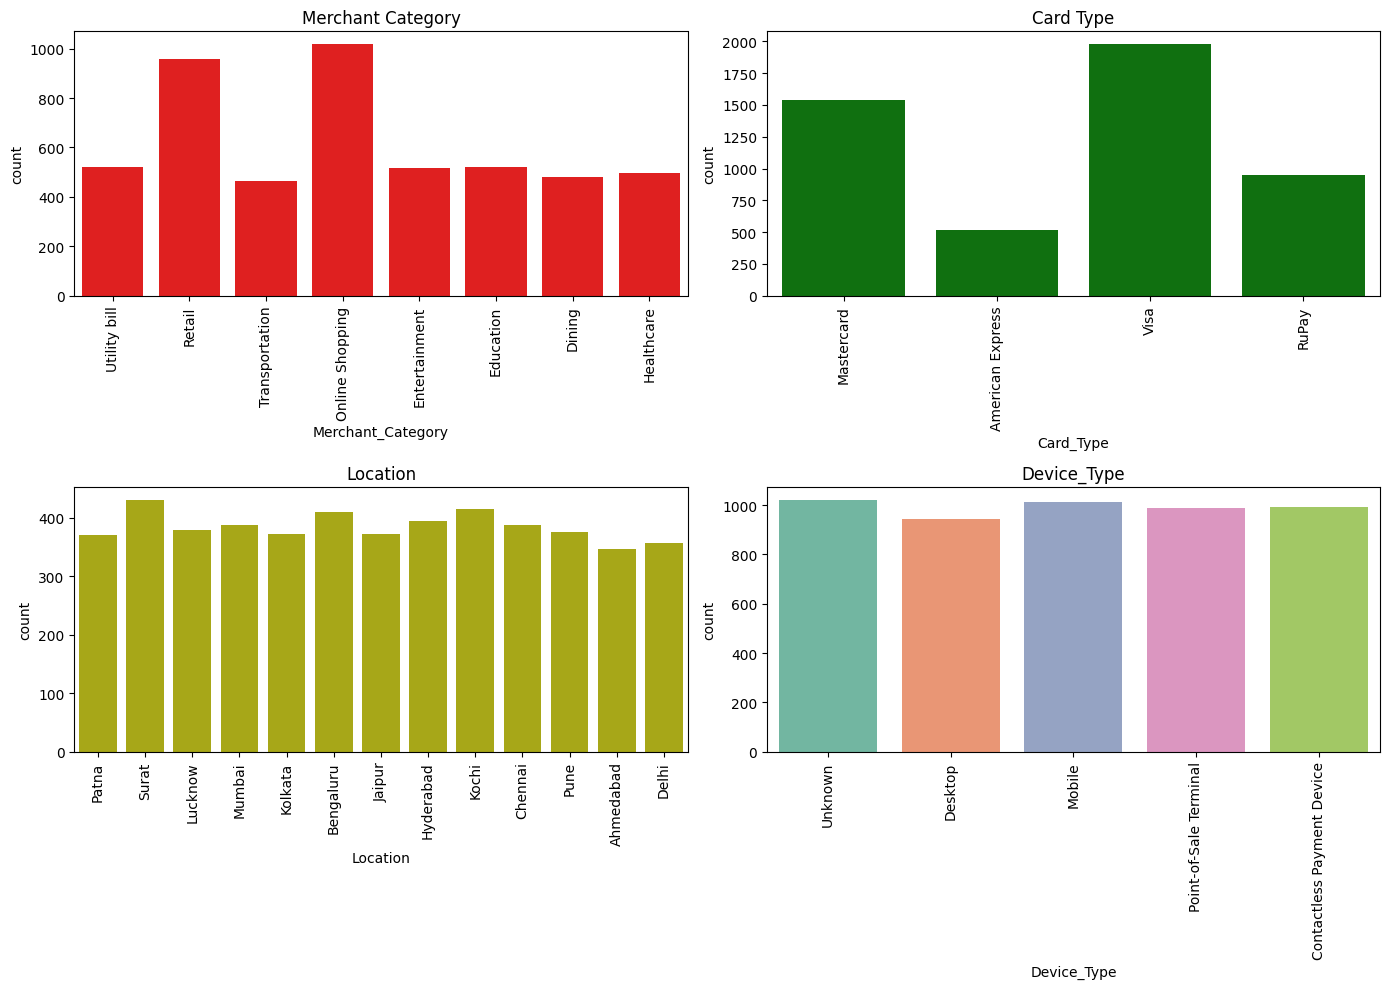

In [ ]:
plt.figure(figsize=(14,10))
#first plot
plt.subplot(2,2,1)
sns.countplot(data=data,x='Merchant_Category',color='r')
plt.xticks(rotation=90)
plt.title('Merchant Category')

#second plot

plt.subplot(2,2,2)
sns.countplot(data=data,x ='Card_Type',color='g')
plt.xticks(rotation=90)
plt.title('Card Type')

#third plot

plt.subplot(2,2,3)
sns.countplot(data=data,x='Location',color='y')
plt.xticks(rotation=90)
plt.title('Location')

#fourth plot

plt.subplot(2,2,4)
sns.countplot(data=data,x='Device_Type',palette="Set2")
plt.xticks(rotation=90)
plt.title('Device_Type')

#adjust layout
plt.tight_layout()
plt.show()

In [ ]:
data.describe()


,Transaction_Amount,Cardholder_Age,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit
count,4994.000000,4865.000000,4686.000000,4792.000000,4991.000000
mean,74667.995995,49.106680,137353.817542,63058.343566,124654.377880
std,43089.045623,18.398524,69471.623020,40056.989704,55668.246494
min,25008.000000,18.000000,35005.000000,10282.410000,50000.000000
25%,39742.500000,33.000000,73485.000000,33336.742500,100000.000000
50%,60922.000000,49.000000,131833.000000,49547.945000,100000.000000
75%,98373.500000,65.000000,189054.250000,83732.352500,150000.000000
max,199923.000000,80.000000,299907.000000,199898.290000,200000.000000


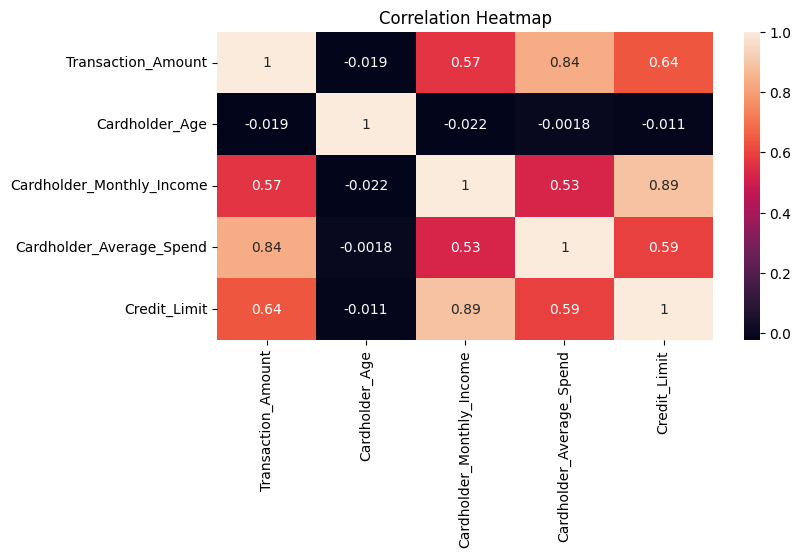

In [ ]:
plt.figure(figsize=(8,4))
# Select only numerical features for correlation
numerical_data = data.select_dtypes(include=np.number)
sns.heatmap(numerical_data.corr(),annot=True)
plt.title('Correlation Heatmap')
plt.show()

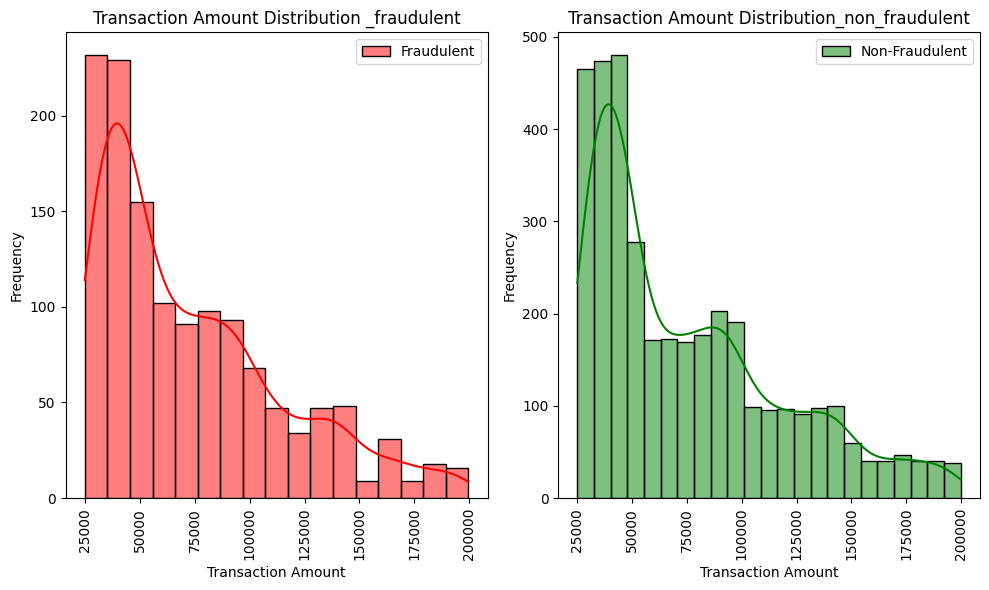

In [ ]:
fraudulent = data[data['Is_Fraudulent'] == 'Yes']
non_fraudulent = data[data['Is_Fraudulent'] == 'No']

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.histplot(fraudulent['Transaction_Amount'],kde=True,color='r',label='Fraudulent')
plt.title('Transaction Amount Distribution _fraudulent')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.legend()

plt.subplot(1, 2, 2)
sns.histplot(non_fraudulent['Transaction_Amount'],kde=True,color='g',label='Non-Fraudulent')
plt.title('Transaction Amount Distribution_non_fraudulent')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.legend()



plt.tight_layout()
plt.show()



###based of the EDA process
####Transaction_Amount,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit these features are more susceptible to fraud.

##2) **Data Preprocessing - Data Cleaning:**🚀

In [ ]:
cat_coll= data.select_dtypes('O').columns.tolist()
print(cat_coll)
num_coll= data.select_dtypes(np.number).columns.tolist()
print(num_coll)

['Transaction_ID', 'Card_Type', 'Merchant_Category', 'Transaction_DateTime', 'Location', 'Region', 'Cardholder_Gender', 'Device_Type', 'Day_of_Week', 'Is_Fraudulent']
['Transaction_Amount', 'Cardholder_Age', 'Cardholder_Monthly_Income', 'Cardholder_Average_Spend', 'Credit_Limit']


In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
data[cat_coll] = imputer.fit_transform(data[cat_coll])

In [ ]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
data[num_coll] = imputer.fit_transform(data[num_coll])

In [ ]:
#z score
from scipy.stats import zscore


z_score = zscore(data[num_coll])
outliers = data[(np.abs(z_score) < 3)]
outliers.shape


(5000, 15)

In [ ]:
data[num_coll].skew()

,0
Transaction_Amount,0.967104
Cardholder_Age,-0.013966
Cardholder_Monthly_Income,0.416118
Cardholder_Average_Spend,1.140316
Credit_Limit,0.012063


<Axes: xlabel='Cardholder_Average_Spend', ylabel='Density'>

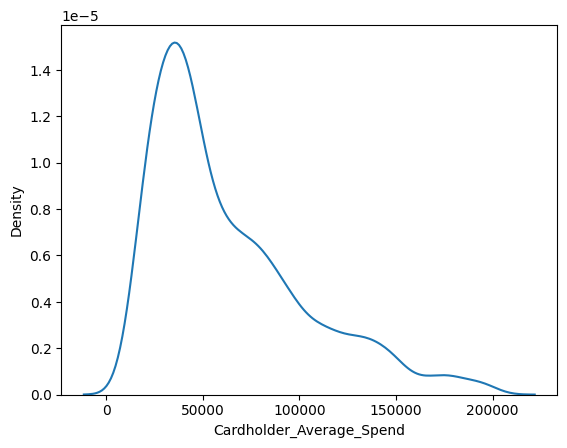

In [ ]:
sns.kdeplot(data['Cardholder_Average_Spend'])

<Axes: xlabel='Cardholder_Average_Spend', ylabel='Density'>

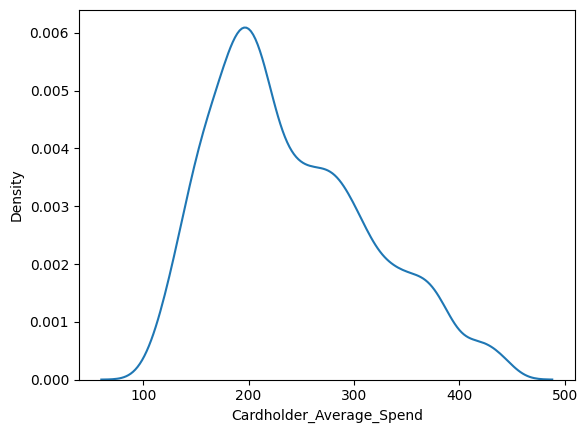

In [ ]:
data['Cardholder_Average_Spend'] = np.sqrt(data['Cardholder_Average_Spend'])
sns.kdeplot(data['Cardholder_Average_Spend'])

In [ ]:
#encodeing data
cat_feature =[ 'Card_Type', 'Merchant_Category', 'Transaction_DateTime', 'Location', 'Region', 'Cardholder_Gender', 'Device_Type', 'Day_of_Week', 'Is_Fraudulent']


from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in cat_feature:
  data[i] =le.fit_transform(data[i])

In [ ]:
x= data[[*num_coll,'Card_Type','Location','Cardholder_Gender','Merchant_Category','Device_Type']]
y=data['Is_Fraudulent']

In [ ]:
#split the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
#feature scaliing
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train[num_coll] = sc.fit_transform(x_train[num_coll] )
x_test[num_coll]  = sc.transform(x_test[num_coll] )

#**⚖💡Model Evaluation**

In [ ]:
#import the libraries
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,recall_score,precision_score

#model access
model={
    'LogisticRegression':LogisticRegression(),
    'GaussianNB':GaussianNB(),
    'KNeighborsClassifier':KNeighborsClassifier(),
    'DecisionTreeClassifier':DecisionTreeClassifier(),
    'RandomForestClassifier':RandomForestClassifier(),
    'SVM':SVC()
}

In [ ]:
#evaluation
result={}
for  name, model in model.items():
  model.fit(x_train,y_train)
  y_pred = model.predict(x_test)
  result[name]={
      "Accuracy": accuracy_score(y_test,y_pred),
      "F1 Score": f1_score(y_test,y_pred)

  }

#connvert the result to dataframe
result_find=pd.DataFrame(result).T
print(result_find)



                        Accuracy  F1 Score
LogisticRegression      0.746667  0.000000
GaussianNB              0.746667  0.000000
KNeighborsClassifier    0.683333  0.168126
DecisionTreeClassifier  0.623333  0.308446
RandomForestClassifier  0.744000  0.025381
SVM                     0.746667  0.000000


In [ ]:
#select the best model based on f1 score

best_model_name = result_find.sort_values(by="Accuracy",ascending=False).index[0]
best_model = [best_model_name]
print(f"best perfomed model is{best_model_name} with highest Accuracy score {result_find.loc[best_model_name,'Accuracy']:.2f}")


best perfomed model isLogisticRegression with highest Accuracy score 0.75


In [ ]:
#Train the selected model using the training dataset and evaluate its performance using
#appropriate metrics like confusion matrix, accuracy, precision, recall, and F1-score.

best_model=LogisticRegression()
best_model.fit(x_train,y_train)
y_pred_best =best_model.predict(x_test)

#evaluation

Accuracy = accuracy_score(y_test,y_pred_best)
Precision = precision_score(y_test,y_pred_best)
recall =recall_score(y_test,y_pred_best)
F1_score =f1_score(y_test,y_pred_best)
Conf_matrix = confusion_matrix(y_test,y_pred_best)


print("Model performence")
print(f"Accuracy:{Accuracy:.2f}")
print(f"Precision:{Precision:.2f}")
print(f"recall:{recall:.2f}")
print(f"F1_score:{F1_score:.2f}")
print(f"Confusion_matrix")
print(Conf_matrix)


Model performence
Accuracy:0.75
Precision:0.00
recall:0.00
F1_score:0.00
Confusion_matrix
[[1120    0]
 [ 380    0]]


##**Interpretaion of Result🧿🏆**

*  Accuracy is 75% is a good model and performing well
*  Precision 0 it mean the model is predicting fraud cases incorrectly none of the transactions flagged as fraud are actually  fraudulent.
*  Recall is 0 no fraud cases detected
*F1_score likely not predict